In [1]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

C:\Users\karlt\Anaconda3\envs\ml_homework\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
rootdir = os.fsdecode('agent_code/my_agent/Training_data/statistics')

stat_files = []

for file in os.listdir(rootdir):
    stat_files.append(os.fsdecode(rootdir + '/' + file))
    
print(stat_files)
raw_stats = []
for file in stat_files:
    raw_stats.append(pickle.load(open(file, 'rb')))

['agent_code/my_agent/Training_data/statistics/001_statistics.txt', 'agent_code/my_agent/Training_data/statistics/002_statistics.txt', 'agent_code/my_agent/Training_data/statistics/003_statistics.txt', 'agent_code/my_agent/Training_data/statistics/004_statistics.txt']


In [3]:
scores, survived, reward, time, steps = {}, {}, {}, {}, {}

statistics = {}

N_gen = 100*int(stat_files[0][45]) + 10*int(stat_files[0][46]) + int(stat_files[0][47])

for gen in raw_stats:
    gen_score, gen_survived, gen_reward, gen_time, gen_steps = np.array([]), np.array([]), np.array([]), np.array([]), np.array([])

    for ep in gen[0]:
        gen_score = np.append(gen_score, ep['score'])
        #gen_survived = np.append(gen_survived, ep['alive'])
        if ep['steps'] < 400:
            gen_survived = np.append(gen_survived, False)
        gen_reward = np.append(gen_reward, ep['reward'])
        gen_time = np.append(gen_time, ep['mean_time'])
        gen_steps = np.append(gen_steps, ep['steps'])
    
    scores[N_gen] = gen_score
    survived[N_gen] = gen_survived
    reward[N_gen] = gen_reward
    time[N_gen] = gen_time
    steps[N_gen] = gen_steps
    N_gen += 1



[1, 2, 3, 4] [0.0011, 0.0578, 0.0557, 0.0001]


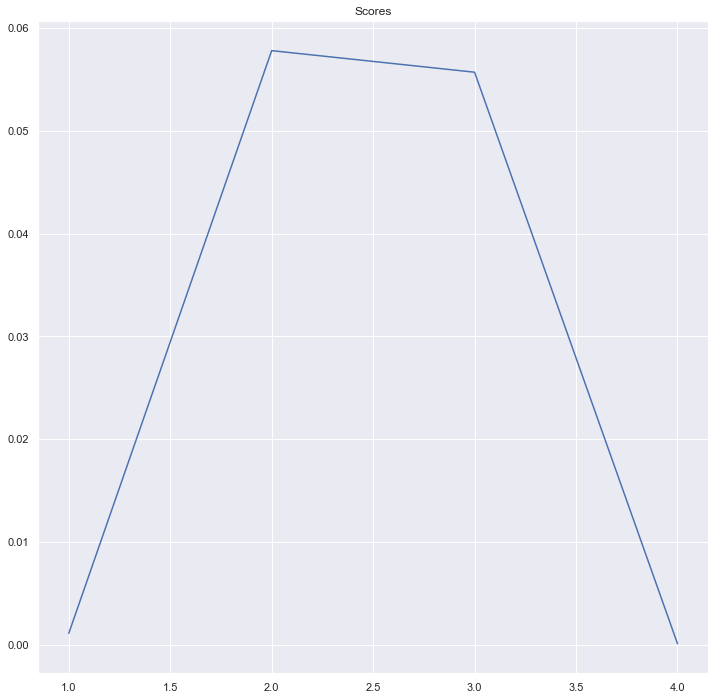

In [4]:
plt.figure(figsize=(12,12))
plt.title('Scores')
y_avg_scores = []
x_gen = []
for gen, sc in scores.items():
    x_gen.append(gen)
    y_avg_scores.append(np.mean(sc))
print(x_gen, y_avg_scores)
plt.plot(x_gen, y_avg_scores, label='gen_1')
plt.show()

[1, 2, 3, 4] [0.0, 0.0, 0.0, 0.0]


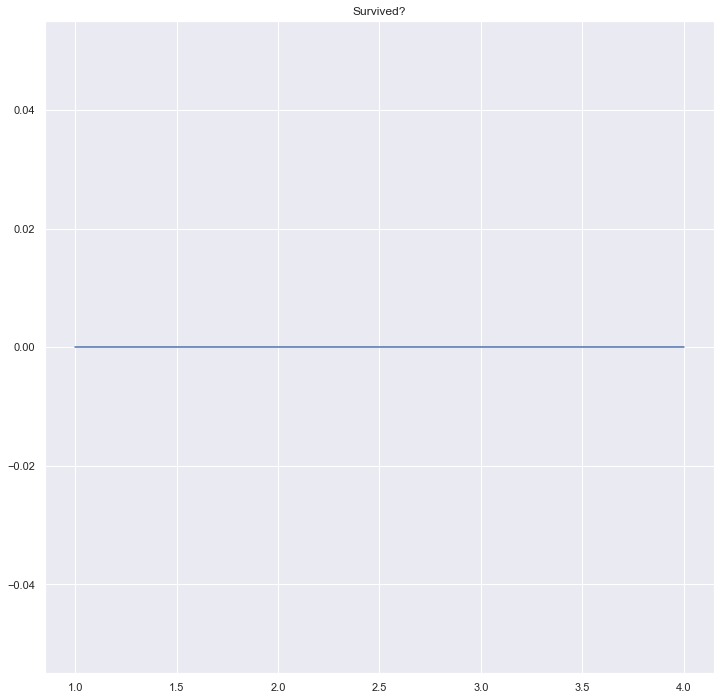

In [5]:
#scores, survived, reward, time, steps
plt.figure(figsize=(12,12))
plt.title('Survived?')
y_avg_survived = []
x_gen = []
for gen, sc in survived.items():
    x_gen.append(gen)
    y_avg_survived.append(np.mean(sc))
print(x_gen, y_avg_survived)
plt.plot(x_gen, y_avg_survived, label='gen_1')
plt.show()

[1, 2, 3, 4] [-5561.0384, -4506.8336, -4580.2251, -4536.3825]


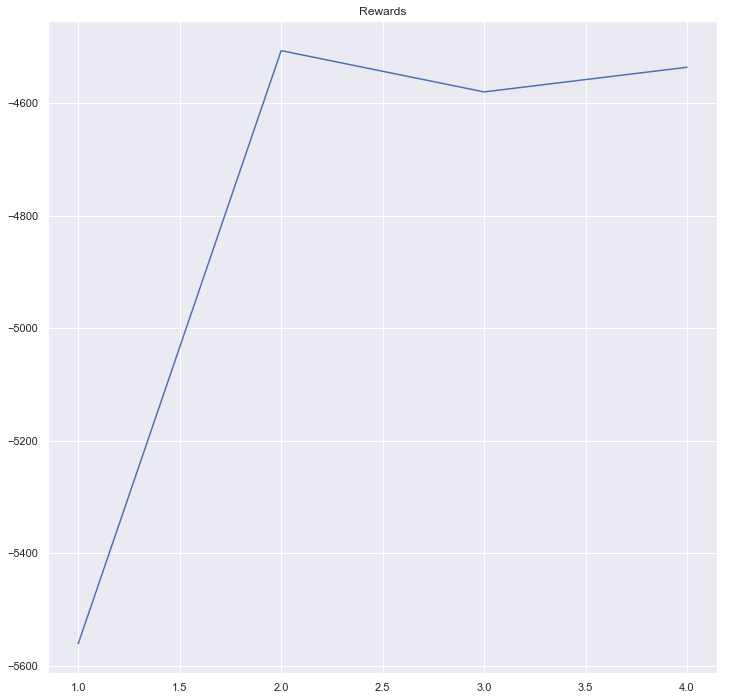

In [6]:
#scores, survived, reward, time, steps
plt.figure(figsize=(12,12))
plt.title('Rewards')
y_avg_rewards = []
x_gen = []
for gen, rew in reward.items():
    x_gen.append(gen)
    y_avg_rewards.append(np.mean(rew))
print(x_gen, y_avg_rewards)
plt.plot(x_gen, y_avg_rewards, label='gen_1')
plt.show()

[1, 2, 3, 4] [16.676, 26.4283, 25.7245, 6.4393]


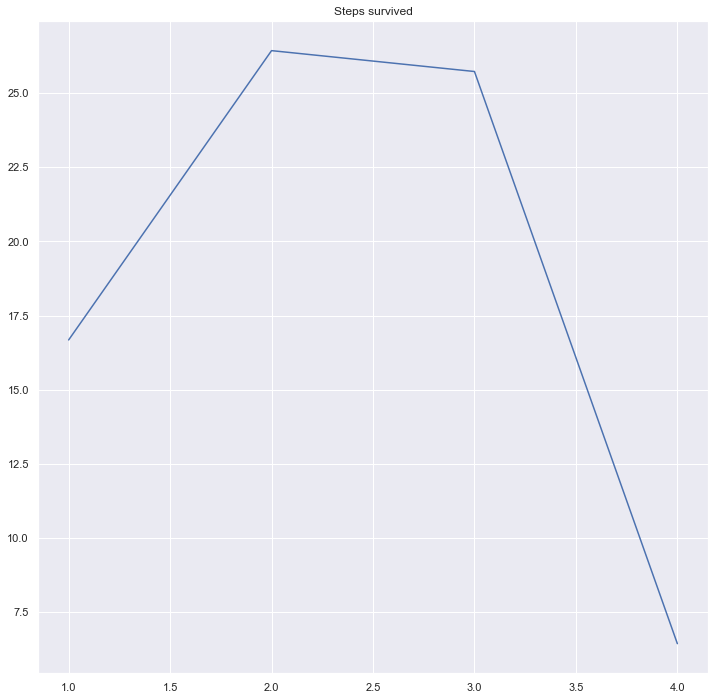

In [7]:
#scores, survived, reward, time, steps
plt.figure(figsize=(12,12))
plt.title('Steps survived')
y_avg_steps = []
x_gen = []
for gen, step in steps.items():
    x_gen.append(gen)
    y_avg_steps.append(np.mean(step))
print(x_gen, y_avg_steps)
plt.plot(x_gen, y_avg_steps, label='gen_1')
plt.show()

In [8]:
rootdir = os.fsdecode('agent_code/my_agent/Training_data/trees')

stat_files = []

for file in os.listdir(rootdir):
    stat_files.append(os.fsdecode(rootdir + '/' + file))
    
print(stat_files[-5])
regressor_BOMB = pickle.load(open(stat_files[-6], 'rb'))
regressor_DOWN = pickle.load(open(stat_files[-5], 'rb'))
regressor_LEFT = pickle.load(open(stat_files[-4], 'rb'))
regressor_RIGHT = pickle.load(open(stat_files[-3], 'rb'))
regressor_UP = pickle.load(open(stat_files[-2], 'rb'))
regressor_WAIT = pickle.load(open(stat_files[-1], 'rb'))
print('regressors loaded')

agent_code/my_agent/Training_data/trees/004_DOWN.txt
regressors loaded


C:\Users\karlt\Anaconda3\envs\ml_homework\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\karlt\Anaconda3\envs\ml_homework\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\karlt\Anaconda3\envs\ml_homework\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\karlt\Anaconda3\envs\ml_homework\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from vers

In [9]:
print(np.argsort(regressor_BOMB.feature_importances_))
print(np.argsort(regressor_WAIT.feature_importances_))

[531 267 266 264 263 470 261 260 471 269 258 473 255 254 474 252 251 249
 248 257 270 272 273 297 296 465 294 293 291 290 467 288 287 468 285 284
 282 281 279 278 276 275 246 299 245 242 209 207 204 203 201 200 198 197
 210 195 192 191 484 189 188 186 185 183 194 212 213 215 476 240 239 237
 236 234 233 231 230 228 227 225 224 481 222 221 219 218 432 243 180 300
 303 393 443 387 386 384 383 444 381 395 380 378 377 375 374 372 371 447
 369 446 396 398 399 431 429 428 435 426 423 437 420 438 417 440 441 411
 408 407 405 404 402 401 368 302 366 363 329 327 326 324 323 321 320 318
 330 317 315 314 312 311 309 308 306 305 460 453 332 333 362 360 359 357
 356 354 353 450 351 350 348 345 344 342 341 339 338 336 335 365 179 216
 177  95  93  92  90  89 509  96  87 487  84  83  81  80  78  86 507  98
  99 498 123 122 120 119 501 117 114 503 504 105 104 102 101 506  77 125
  75  72  26  24  23  21  20  18  27  17 523  12   9   4 526   1  15  29
  30  40  67  63  62  60  59 513  57  56  54  53  5

In [10]:
import numpy as np

tester = np.arange(5)
gammas = 0.9**np.arange(tester.shape[0])
output = []
for y in range(tester.shape[0]):
    output.append(np.sum(tester[y:]*gammas[:tester.shape[0]-y]))

print (tester)
print (output)
print (0.9+0.9**2*2+0.9**3*3+0.9**4*4)

[0 1 2 3 4]
[7.3314, 8.146, 7.94, 6.6, 4.0]
7.3314
